# Exercise 1
In the lab, a classification tree was applied to the “Carseats” data set after converting “Sales” into a qualitative response variable. Now we will seek to predict “Sales” using regression trees and related approaches, treating the response as a quantitative variable.

In [1]:
library('ISLR')
set.seed(1998)
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


## Task (a)
Split the data set into a training set and a test set.

In [2]:
train_idx = sample(1 : nrow(Carseats), nrow(Carseats)/2)
train = Carseats[train_idx,]
test = Carseats[-train_idx,]

print(dim(Carseats))
print(dim(train))
print(dim(test))

[1] 400  11
[1] 200  11
[1] 200  11


## Task (b)
- Fit a regression tree to the training set. Plot the tree, and interpret the results.
- What test MSE do you obtain?

In [3]:
library(tree)
tree.fit = tree(Sales ~ ., data = train)
summary(tree.fit)


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Age"         "Income"     
[6] "Advertising" "Education"   "Population" 
Number of terminal nodes:  18 
Residual mean deviance:  2.169 = 394.7 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.27900 -1.08100 -0.01183  0.00000  0.83700  3.31500 

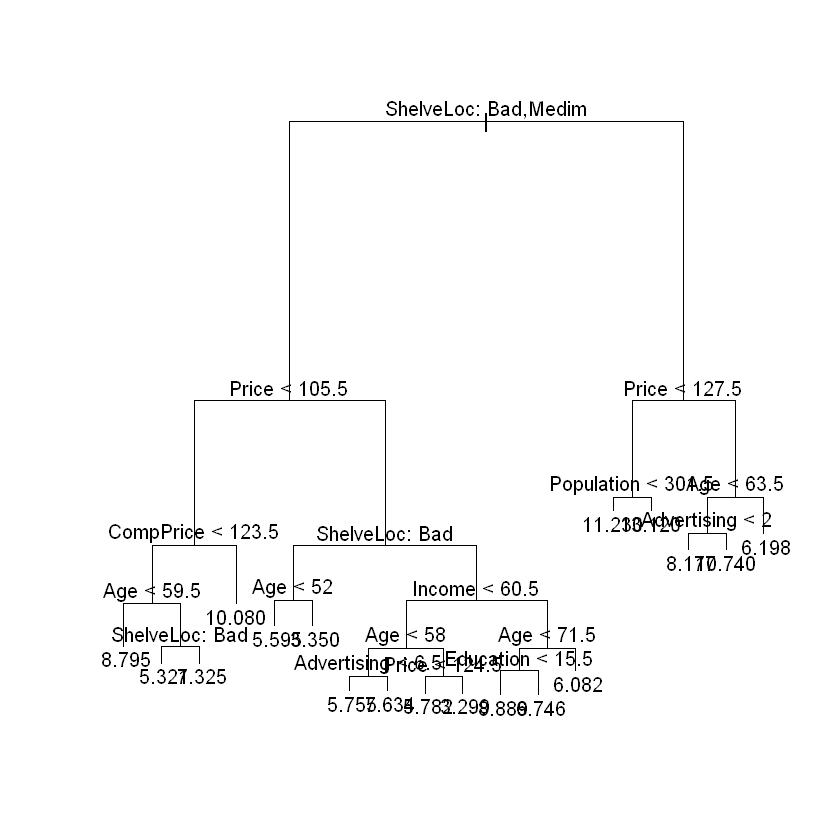

In [4]:
plot(tree.fit)
text(tree.fit, pretty=5)

**Comment:**

From the above plot, we can see that "ShelveLoc" is the most important predictor, followed by "Price", "Age" and "CompPrice".

In [5]:
mean((predict(tree.fit, newdata=test) - test$Sales)^2)

[1] 5.291413

**Comment:**

When evaluating the tree model on test set, we obtained an MSE of about 5.29.

## Task (c)
- Use cross-validation in order to determine the optimal level of tree complexity.
- Does pruning the tree improve the test MSE?

In [6]:
cv.eval = cv.tree(tree.fit, K = 20)

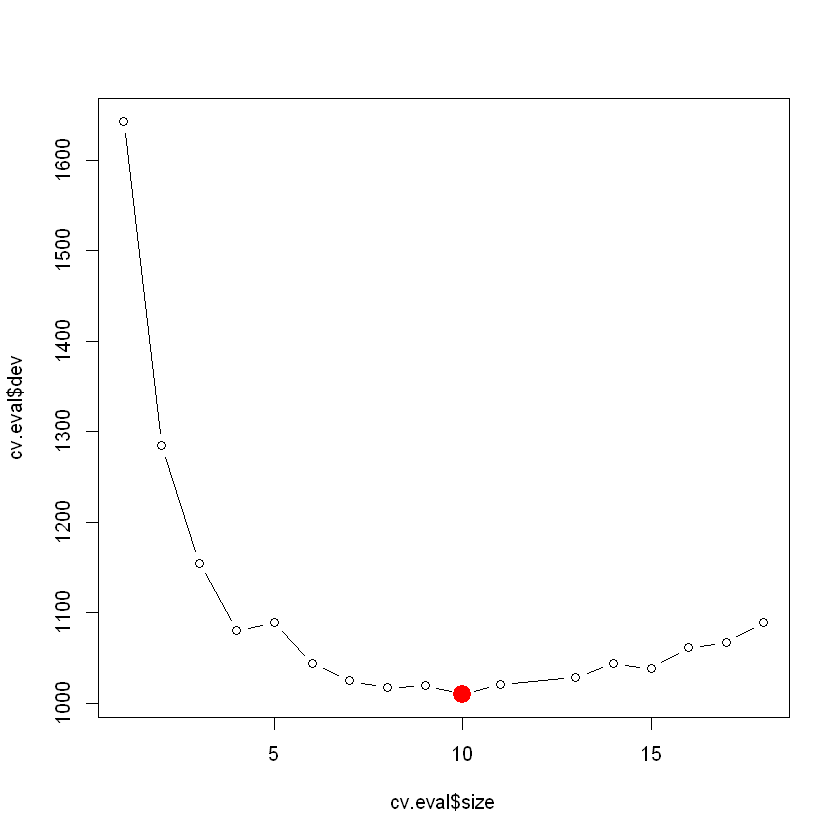

In [7]:
plot(cv.eval$size, cv.eval$dev, type='b')
tree.min = which.min(cv.eval$dev)
points(cv.eval$size[tree.min], cv.eval$dev[tree.min], col = "red", cex = 3, pch = 20)

**Comment:**

In this case, the tree of size 10 is selected by cross-validation. We now prune the tree to obtain the 10-node tree.

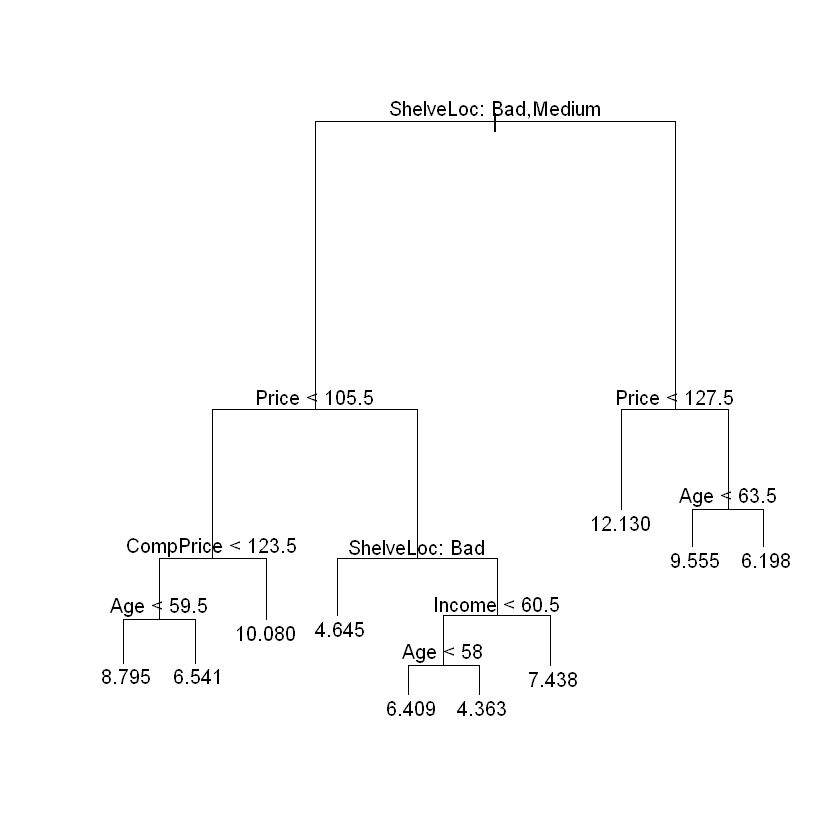

In [8]:
prune.fit = prune.tree(tree.fit, best = cv.eval$size[tree.min])
plot(prune.fit)
text(prune.fit, pretty = 0)

In [9]:
mean((predict(prune.fit, newdata=test) - test$Sales)^2)

[1] 4.912128

**Comment:**

Prunnning the tree decreased test MSE to 4.91.

## Task (d)
- Use the bagging approach in order to analyze this data. What test error rate do you obtain ? 
- Use the “importance()” function to determine which variables are most important.

In [10]:
library(randomForest)

bag.fit = randomForest(Sales ~ ., data = train, mtry = 10, ntree = 500, importance = TRUE)
mean((predict(bag.fit, newdata = test) - test$Sales)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



[1] 2.509686

**Comment:**

Bagging decreased test MSE to 2.51.

In [11]:
importance(bag.fit)

,%IncMSE,IncNodePurity
CompPrice,22.436606,157.546114
Income,4.390051,73.838299
Advertising,14.823004,126.628621
Population,-1.390216,60.761755
Price,49.596130,426.701738
ShelveLoc,53.752326,434.213922
Age,22.476230,214.755462
Education,2.655059,55.991428
Urban,-1.329049,9.422319
US,2.179891,7.781087


**Comment:**

ShelveLoc and Price are the most importance predictors, followed by Age,  CompPrice and Advertising.

## Task (e)
- Use random forests to analyze this data. What test error rate do you obtain ? 
- Use the "importance()" function to determine which variables are most important. 
- Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [12]:
rf.fit = randomForest(Sales ~ ., data = train, mtry = 5, ntree = 500, importance = TRUE)
mean((predict(rf.fit, newdata = test) - test$Sales)^2)

[1] 2.684231

**Comment:**

With m = 0.5p, we have a Test MSE of 2.68.

In [13]:
importance(rf.fit)

,%IncMSE,IncNodePurity
CompPrice,12.6976977,144.49265
Income,6.0332033,100.84750
Advertising,11.9742664,138.18090
Population,0.8205712,80.87692
Price,38.4508100,377.02624
ShelveLoc,41.1955639,361.68194
Age,19.3532543,228.41756
Education,4.4943213,73.38590
Urban,-1.6452173,10.79296
US,1.8242812,16.51029


**Comment:**

In this case, Price and ShelveLoc are once again the two most important predictors, followed by Age, CompPrice and Advertising

# Exercise 2
This problem involves the “OJ” data set which is part of the “ISLR” package.

In [14]:
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


## Task (a)
Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [15]:
train_idx = sample(1 : nrow(OJ), 800)
train = OJ[train_idx,]
test = OJ[-train_idx,]

print(dim(OJ))
print(dim(train))
print(dim(test))

[1] 1070   18
[1] 800  18
[1] 270  18


## Task (b)
- Fit a tree to the training data, with "Purchase" as the response and the other variables except for “Buy” as predictors. 
- Use the "summary()" function to produce summary statistics about the tree, and describe the results obtained. 
- What is the training error rate? How many terminal nodes does the tree have ?

In [16]:
tree.fit = tree(Purchase ~ ., data = train)
summary(tree.fit)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "ListPriceDiff" "DiscCH"       
Number of terminal nodes:  7 
Residual mean deviance:  0.7643 = 606.1 / 793 
Misclassification error rate: 0.1675 = 134 / 800 

**Comment:**

- From the summary, we can conclude that only LoyalCH, SalePriceMM, ListPriceDiff and DiscCH are important in making prediction.
- Training error rate: 0.1675
- Terminal nodes: 7

## Task (c)
Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [17]:
tree.fit

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1077.00 CH ( 0.60000 0.40000 )  
   2) LoyalCH < 0.469289 298  310.00 MM ( 0.21477 0.78523 )  
     4) LoyalCH < 0.051325 71   10.51 MM ( 0.01408 0.98592 ) *
     5) LoyalCH > 0.051325 227  268.10 MM ( 0.27753 0.72247 )  
      10) SalePriceMM < 2.04 118  110.50 MM ( 0.17797 0.82203 ) *
      11) SalePriceMM > 2.04 109  145.30 MM ( 0.38532 0.61468 ) *
   3) LoyalCH > 0.469289 502  459.80 CH ( 0.82869 0.17131 )  
     6) LoyalCH < 0.764572 237  294.30 CH ( 0.68776 0.31224 )  
      12) ListPriceDiff < 0.235 95  131.20 MM ( 0.46316 0.53684 )  
        24) DiscCH < 0.115 86  116.20 MM ( 0.40698 0.59302 ) *
        25) DiscCH > 0.115 9    0.00 CH ( 1.00000 0.00000 ) *
      13) ListPriceDiff > 0.235 142  125.80 CH ( 0.83803 0.16197 ) *
     7) LoyalCH > 0.764572 265   97.72 CH ( 0.95472 0.04528 ) *

**Comment:**

- Here I choose the node labelled 4, which is a terminal node because of the asterisk.
- The split criterion is LoyalCH < 0.051.
- The number of observations in that branch is 71 with a deviance of 10.51 and an overall prediction for the branch of MM.
- Less than 1.5% of the observations in that branch take the value of CH, and the remaining 98.5% take the value of MM.

## Task (d)
Create a plot of the tree, and interpret the results.

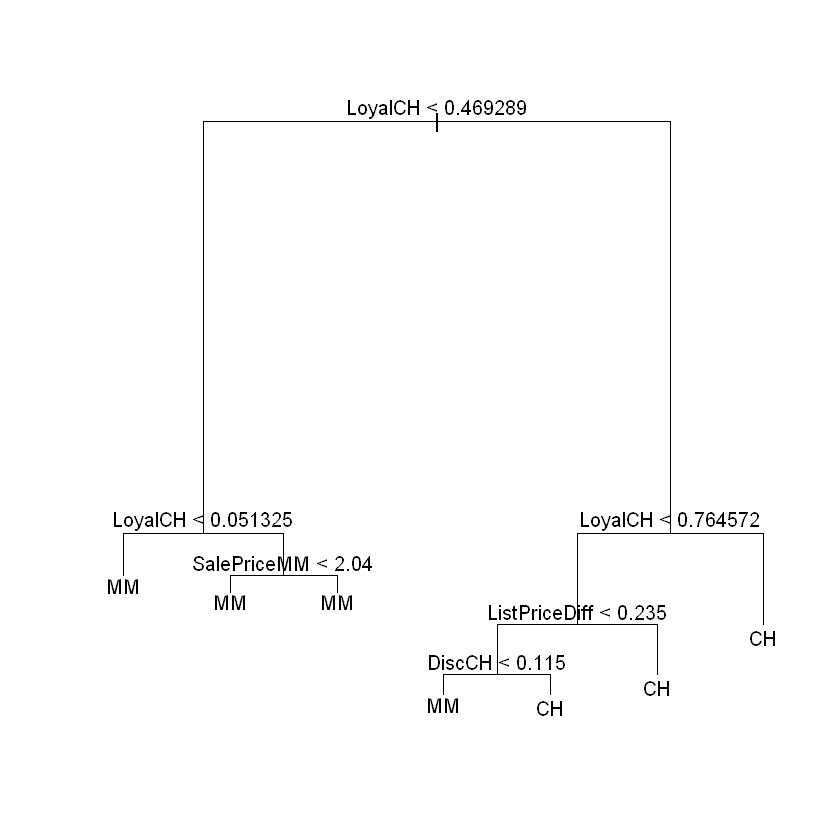

In [18]:
plot(tree.fit)
text(tree.fit, pretty = 0)

**Comment:**

The most important predictor of Purchase appears to be "LoyalCH", since the first branch differentiates the intensity of customer brand loyalty to CH. In fact, the top three nodes contain "LoyalCH".

## Task (e)
- Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. 
- What is the test error rate ?

In [19]:
confusion_matrix = table(predict(tree.fit, test, type = "class"), test$Purchase)
confusion_matrix

    
      CH  MM
  CH 131  15
  MM  42  82

In [20]:
TruePred = confusion_matrix[1, 1] + confusion_matrix [2, 2]
FalsePred = confusion_matrix[1, 2] + confusion_matrix [2, 1]
print(TruePred)
print(FalsePred)
print(FalsePred/(TruePred+FalsePred))

[1] 213
[1] 57
[1] 0.2111111


**Comment:**

The test error rate is about 21.11%

## Task (f)
Apply the "cv.tree()" function to the training set in order to determine the optimal size tree.

In [21]:
cv.eval = cv.tree(tree.fit, K=20)
cv.eval

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  718.5719  714.9748  696.4151  728.5338  743.7698  794.4258 1078.6945

$k
[1]      -Inf  12.29767  14.95455  31.39305  37.32384  67.77637 306.98162

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

**Comment:**

In this case, the tree of size 5 is selected by cross-validation

## Task (g)
Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

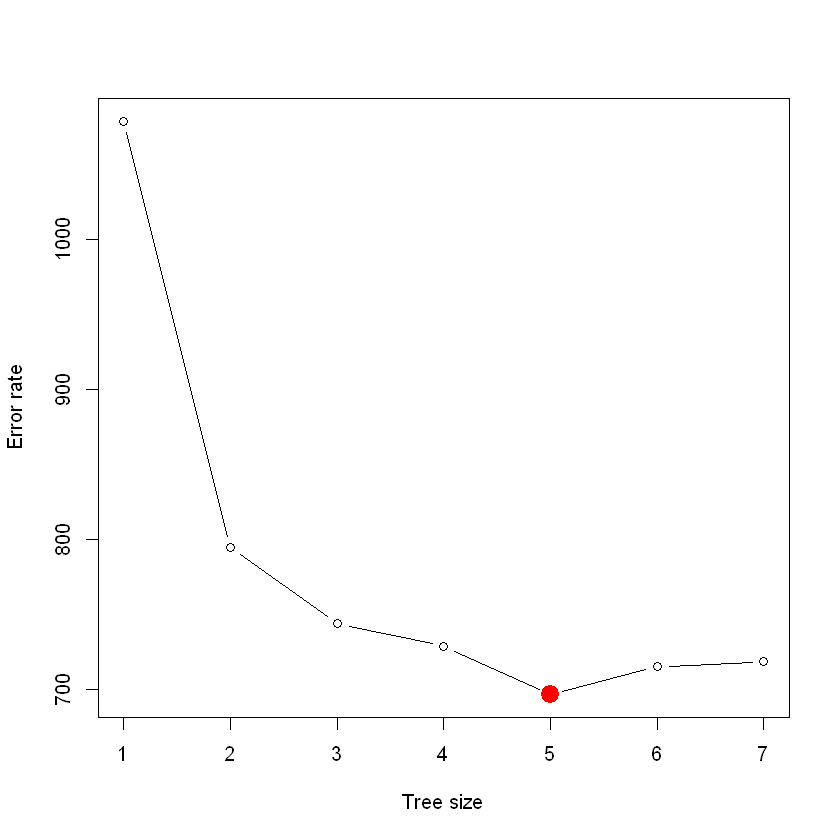

In [22]:
plot(cv.eval$size, cv.eval$dev, type='b', xlab = "Tree size", ylab = "Error rate")
tree.min = which.min(cv.eval$dev)
points(cv.eval$size[tree.min], cv.eval$dev[tree.min], col = "red", cex = 3, pch = 20)

## Task (h)
- Which tree size corresponds to the lowest cross-validated classification error rate?

**Comment:**

Tree of size 5

## Task (i)
- Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.
- If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

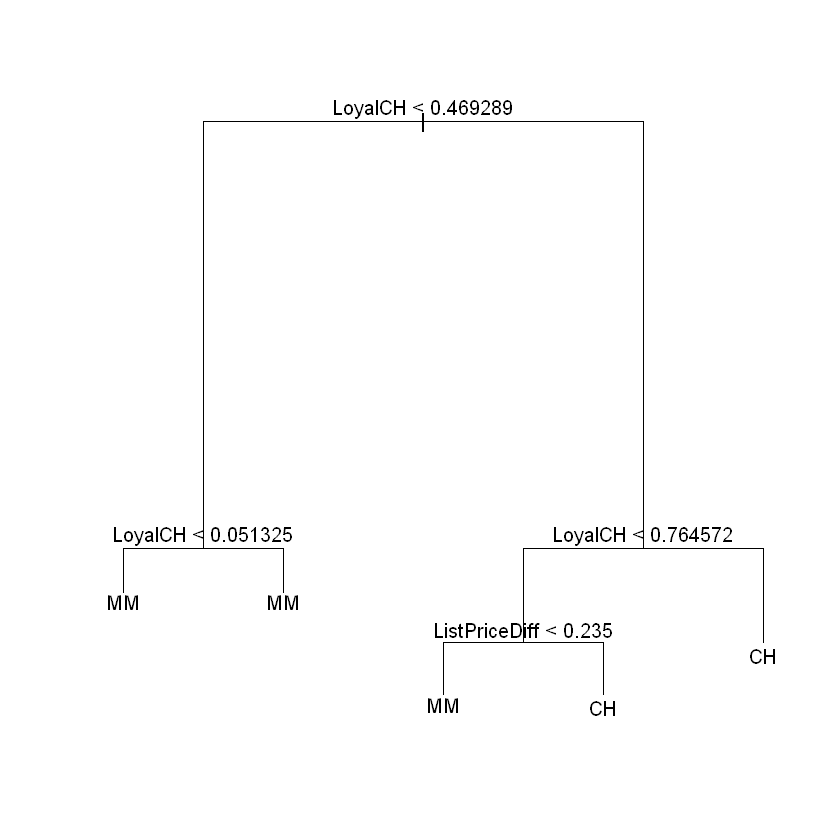

In [23]:
prune.fit = prune.tree(tree.fit, best = cv.eval$size[tree.min])
plot(prune.fit)
text(prune.fit, pretty = 0)

## Task (j)
Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [24]:
summary(tree.fit)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "ListPriceDiff" "DiscCH"       
Number of terminal nodes:  7 
Residual mean deviance:  0.7643 = 606.1 / 793 
Misclassification error rate: 0.1675 = 134 / 800 

In [25]:
summary(prune.fit)


Classification tree:
snip.tree(tree = tree.fit, nodes = c(5L, 12L))
Variables actually used in tree construction:
[1] "LoyalCH"       "ListPriceDiff"
Number of terminal nodes:  5 
Residual mean deviance:  0.7967 = 633.3 / 795 
Misclassification error rate: 0.1788 = 143 / 800 

**Comment:**

The training error rate is slightly higher for the pruned tree (17.88% vs 16.75%).

## Task (k)
Compare the test error rates between the pruned and unpruned trees. Which is higher ?

In [26]:
confusion_matrix = table(predict(prune.fit, test, type = "class"), test$Purchase)
confusion_matrix

    
      CH  MM
  CH 130  15
  MM  43  82

In [27]:
TruePred = confusion_matrix[1, 1] + confusion_matrix [2, 2]
FalsePred = confusion_matrix[1, 2] + confusion_matrix [2, 1]
print(TruePred)
print(FalsePred)
print(FalsePred/(TruePred+FalsePred))

[1] 212
[1] 58
[1] 0.2148148


**Comment:**

The test error rate is slightly higher for the pruned tree (21.48%  vs 21.11%).

# Exercise 3
We now use boosting to predict “Salary” in the “Hitters” data set.
## Task (a)
Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [28]:
Hitters = na.omit(Hitters)
Hitters$Salary = log(Hitters$Salary)
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,4.248495,A


## Task (b)
Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [29]:
train = Hitters[1:200,]
test = Hitters[-(1:200),]
dim(train)
dim(test)

[1] 200  20

[1] 63 20

## Task (c)
Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

Loaded gbm 2.1.5



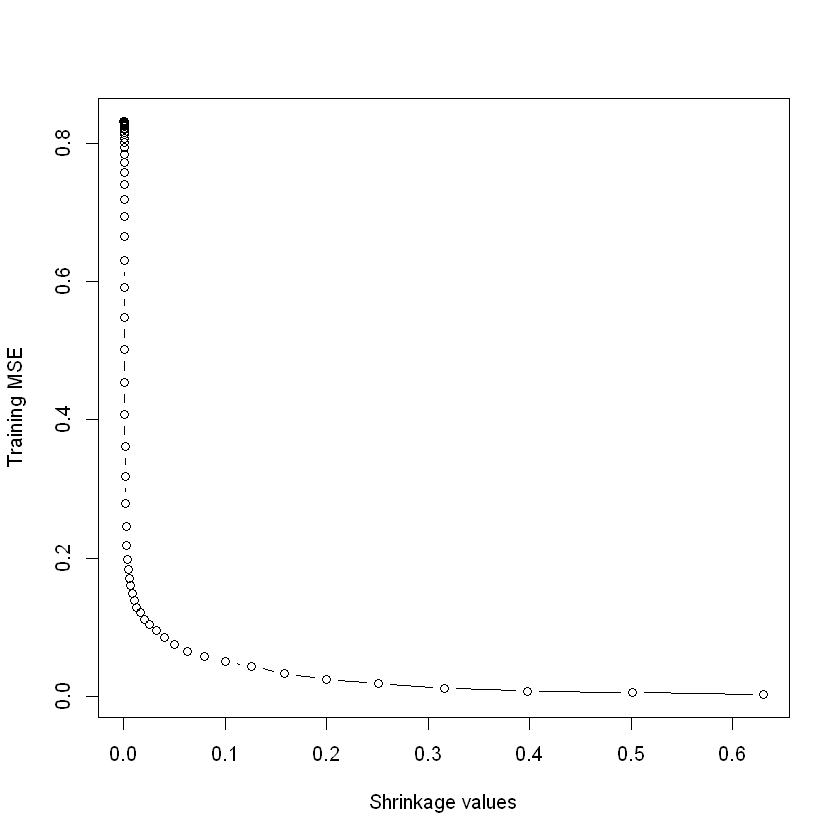

In [30]:
library(gbm)
set.seed(1998)

pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
train.err = rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters = gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    # Training MSE:
    train.err[i] <- mean((predict(boost.hitters, train, n.trees = 1000) - train$Salary)^2)
}
plot(lambdas, train.err, type = "b", xlab = "Shrinkage values", ylab = "Training MSE")

## Task (d)
Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

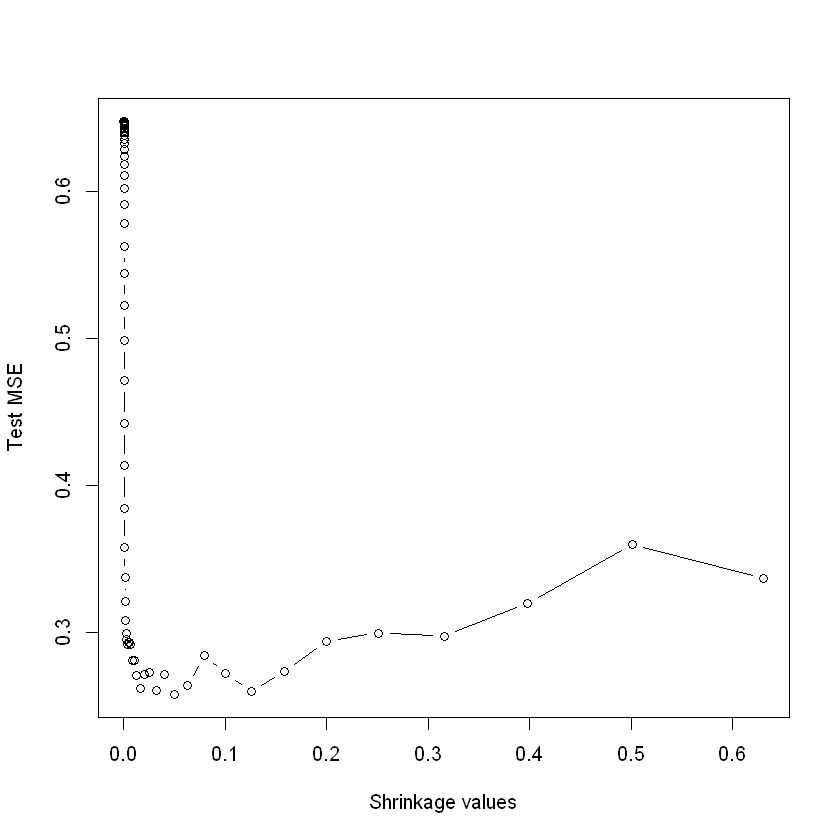

In [31]:
set.seed(1998)

test.err = rep(NA, length(lambdas))
for (i in 1:length(lambdas)) {
    boost.hitters = gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
    # Test MSE:
    test.err[i] = mean((predict(boost.hitters, test, n.trees = 1000) - test$Salary)^2)
}
plot(lambdas, test.err, type = "b", xlab = "Shrinkage values", ylab = "Test MSE")

In [32]:
min(test.err)
lambdas[which.min(test.err)]

[1] 0.2576472

[1] 0.05011872

**Comment:**
The minimum test MSE is 0.258, and is obtained for λ=0.05.

## Task (e)
Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [33]:
# Linear regression
lm.fit = lm(Salary ~ ., data = train)
mean((predict(lm.fit, test) - test$Salary)^2)

[1] 0.4917959

**Comment:**
The test MSE for boosting is lower than for linear regression.

## Task (f)
Which variables appear to be the most important predictors in the boosted model?

,var,rel.inf
,<fct>,<dbl>
CAtBat,CAtBat,24.3942209
CRBI,CRBI,9.1576886
CWalks,CWalks,7.7358249
CRuns,CRuns,7.5975034
Years,Years,6.9322986
PutOuts,PutOuts,6.5139719
CHmRun,CHmRun,5.5797847
RBI,RBI,5.3895928
Walks,Walks,5.2948876


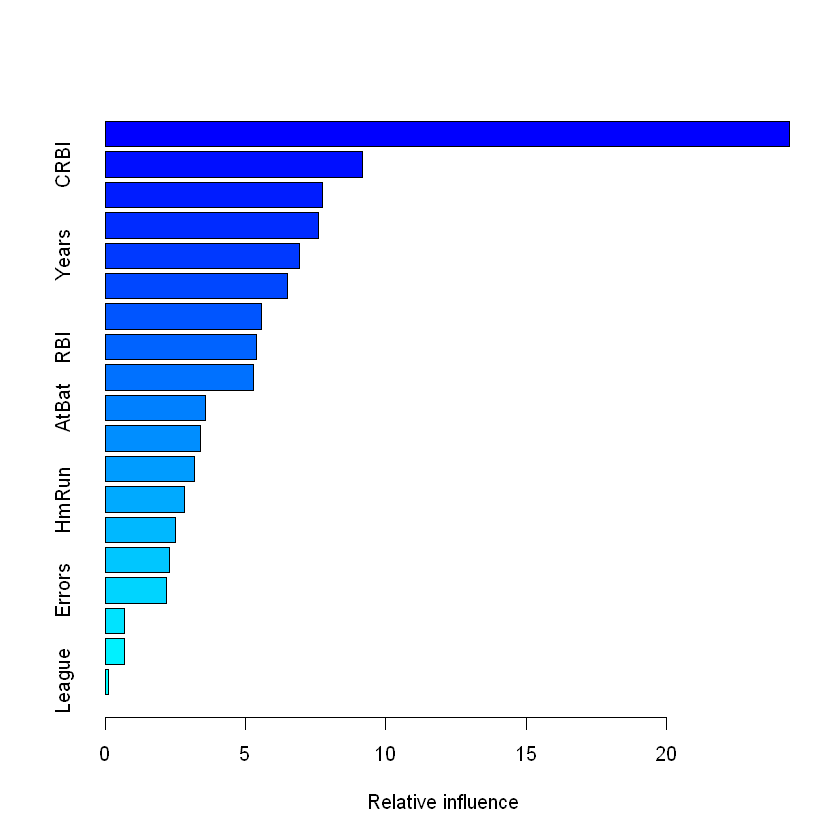

In [34]:
boost.hitters = gbm(Salary ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.err)])
summary(boost.hitters)

**Comment:**
CAtBat is most important variable, followed by CRBI, CWalks, CRuns, etc.


## Task (g)
Now apply bagging to the training set. What is the test set MSE for this approach ?

In [35]:
set.seed(1998)
bag.hitters = randomForest(Salary ~ ., data = train, mtry = 19, ntree = 500)
mean((predict(bag.hitters, newdata = test) - test$Salary)^2)

[1] 0.2320836

**Comment:**
Test MSE for bagging is 0.23, which is slightly lower than test MSE for boosting.

# Exercise 4
This question uses the “Caravan” data set.

## Task (a)
Create a training set consisting of the first 1000 observations, and a test set consisting of the remaining observations.

In [36]:
Caravan$Purchase = ifelse(Caravan$Purchase == "Yes", 1, 0)
train = Caravan[(1:1000),]
test = Caravan[-(1:1000),]
dim(train)
dim(test)

[1] 1000   86

[1] 4822   86

## Task (b)
Fit a boosting model to the training set with “Purchase” as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. Which predictors appear to be most important ?

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 50: PVRAAUT has no variation."
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 71: AVRAAUT has no variation."


,var,rel.inf
,<fct>,<dbl>
PPERSAUT,PPERSAUT,13.8894581
MKOOPKLA,MKOOPKLA,9.9278724
MOPLHOOG,MOPLHOOG,7.6486640
MBERMIDD,MBERMIDD,5.7522747
PBRAND,PBRAND,5.6868878
ABRAND,ABRAND,4.7798948
MGODGE,MGODGE,4.5660974
MINK3045,MINK3045,4.0037420
PWAPART,PWAPART,3.2230558


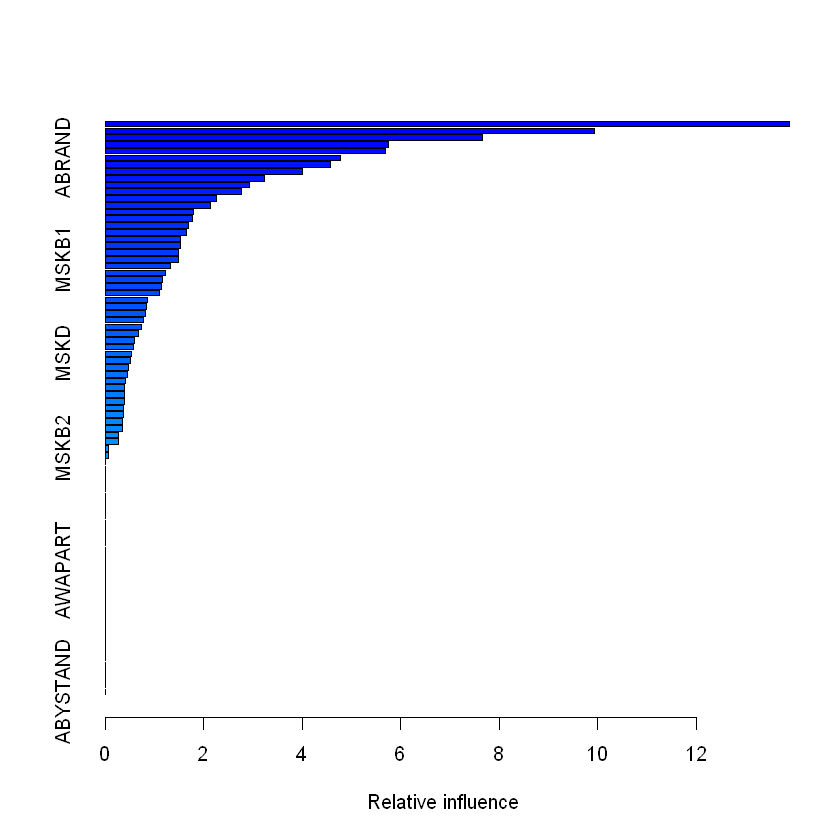

In [37]:
set.seed(1998)
boost.caravan = gbm(Purchase ~ ., data = train, distribution = "gaussian", n.trees = 1000, shrinkage = 0.01)
summary(boost.caravan)

**Comment:**
PPERSAUT is the most important predictor, followed by MKOOPKLA, MOPLHOOG, ect.

## Task (c)
Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one ? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [38]:
pred.test = ifelse(predict(boost.caravan, test, n.trees = 1000, type = "response") > 0.2, 1, 0)
confusion_matrix = table(test$Purchase, pred.test)
confusion_matrix

   pred.test
       0    1
  0 4493   40
  1  279   10

In [39]:
TruePred_Yes = confusion_matrix[2, 2]
FalsePred_Yes = confusion_matrix[1, 2]
print(TruePred_Yes/(TruePred_Yes+FalsePred_Yes))

[1] 0.2


**Comment:**
For boosting, the fraction of people predicted to make a purchase that in fact make one is 0.2.

In [40]:
logit.caravan = glm(Purchase ~ ., data = train, family = "binomial")
pred.test = ifelse(predict(logit.caravan, test, type = "response") > 0.2, 1, 0)
confusion_matrix = table(test$Purchase, pred.test)
confusion_matrix

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


   pred.test
       0    1
  0 4183  350
  1  231   58

In [41]:
TruePred_Yes = confusion_matrix[2, 2]
FalsePred_Yes = confusion_matrix[1, 2]
print(TruePred_Yes/(TruePred_Yes+FalsePred_Yes))

[1] 0.1421569


**Comment:**
For logistic regression, the fraction of people predicted to make a purchase that in fact make one is 0.142.